In [1]:
# importing the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge

In [2]:
# read the data into a pandas dataFrame
df = pd.read_csv('energydata_complete (1).csv')

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


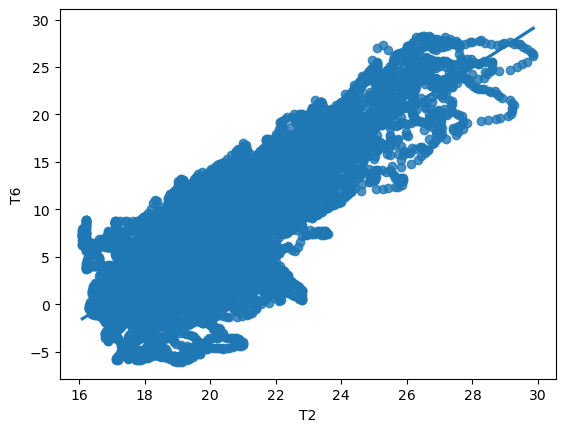

In [4]:
X = df['T2']
y = df['T6']
sns.regplot(x=X, y=y, data=df)

r2 = r2_score(X,y)
# round(r2,2)

In [5]:
# Dropping the column date and lights
df.drop(columns=['date', 'lights'], inplace=True)

In [6]:
# Normalisation and setting the feature variables and targeted variables
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
targeted_column_df = normalised_df['Appliances']


In [7]:
# Training and fitting the model. 

X_train, X_test, y_train, y_test = train_test_split(features_df, targeted_column_df, test_size=0.30, random_state=42)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predicting the model 
predictions = linear_model.predict(X_test)

In [9]:
#The mean absolute error
mae = mean_absolute_error(y_test, predictions)
round(mae,3)

0.05

In [10]:
# The root mean squared error
import math
rmse = math.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.088

In [11]:
# The residual sum of square
round(np.sum(np.square(predictions - y_test)),2)

45.34

In [12]:
# the coefficient of determination
r2_score = r2_score(y_test, predictions)
round(r2_score,2)


0.15

In [13]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4)

In [14]:
# new rmse

predictions = ridge_reg.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.088

The rmse did not change even though the ridge regrssion have a value alpha= 0.4

In [15]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [16]:
predictions = lasso_reg.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, predictions))
round(rmse, 3)

0.094

The new rmse with an alpha=0.001 for a lasso regression is 0.094

In [17]:
#comparing the effects of regularization
def get_weights_df(model, feat, col_name):
  weights =  pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features',col_name]
  weights_df[col_name].round(3)
  return weights_df

In [18]:
linear_weights = get_weights_df(linear_model, X_train, 'Linear_Weight')
ridge_weights =  get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

In [19]:
final_weights = pd.merge(linear_weights, ridge_weights, on='Features')
final_weights = pd.merge(final_weights, lasso_weights, on='Features')

In [20]:
final_weights

,Features,Linear_Weight,Ridge_Weight,Lasso_weight
0,rv2,-2.219382e+11,0.000748,-0.000000
1,RH_2,-4.567699e-01,-0.411071,-0.000000
2,T_out,-3.220071e-01,-0.262172,0.000000
3,T2,-2.361966e-01,-0.201397,0.000000
4,T9,-1.899221e-01,-0.188916,-0.000000
5,RH_8,-1.576066e-01,-0.156830,-0.000110
6,RH_out,-7.770744e-02,-0.054724,-0.049557
7,RH_7,-4.455795e-02,-0.045977,-0.000000
8,RH_9,-3.980120e-02,-0.041367,-0.000000
9,T5,-1.567787e-02,-0.019853,-0.000000
